In [125]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

df = pd.read_csv('./Sleep_health_and_lifestyle_dataset.csv')
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [126]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [127]:
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic BP'] = df['Systolic BP'].astype('int')
df['Diastolic BP'] = df['Diastolic BP'].astype('int')

systolic_ranges = [0, 120, 140, 160, np.inf]
bp_classification = ['Normal', 'Pre-hypertension', 'Stage 1 Hypertension', 'Stage 2 Hypertension']
df['BP Classification'] = pd.cut(df['Systolic BP'], bins=systolic_ranges, labels=bp_classification)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP,BP Classification
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83,Pre-hypertension
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,Pre-hypertension
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,Pre-hypertension
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Pre-hypertension
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Pre-hypertension


In [128]:
cat_cols = ["Gender", "Occupation", "BMI Category", "BP Classification","Sleep Disorder"]

for c in cat_cols:
    le = LabelEncoder()
    le.fit(df[c])
    df[c] = le.transform(df[c])
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP,BP Classification
0,1,1,27,9,6.1,6,42,6,3,126/83,77,4200,1,126,83,1
1,2,1,28,1,6.2,6,60,8,0,125/80,75,10000,1,125,80,1
2,3,1,28,1,6.2,6,60,8,0,125/80,75,10000,1,125,80,1
3,4,1,28,6,5.9,4,30,8,2,140/90,85,3000,2,140,90,1
4,5,1,28,6,5.9,4,30,8,2,140/90,85,3000,2,140,90,1


In [129]:
X = df[['Gender','Age','Occupation','Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level',
        'BMI Category','Heart Rate','Daily Steps','BP Classification']]
Y = df["Sleep Disorder"]
print(X.shape)
print(Y.shape)

(374, 11)
(374,)


In [130]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(299, 11) (299,)
(75, 11) (75,)


In [131]:
decision_tree_clf = DecisionTreeClassifier(criterion='entropy')
decision_tree_clf = decision_tree_clf.fit(X_train, Y_train)

Y_predict = decision_tree_clf.predict(X_test)
score = accuracy_score(Y_test, Y_predict)
print("分類的預測準確度：", score)

分類的預測準確度： 0.92


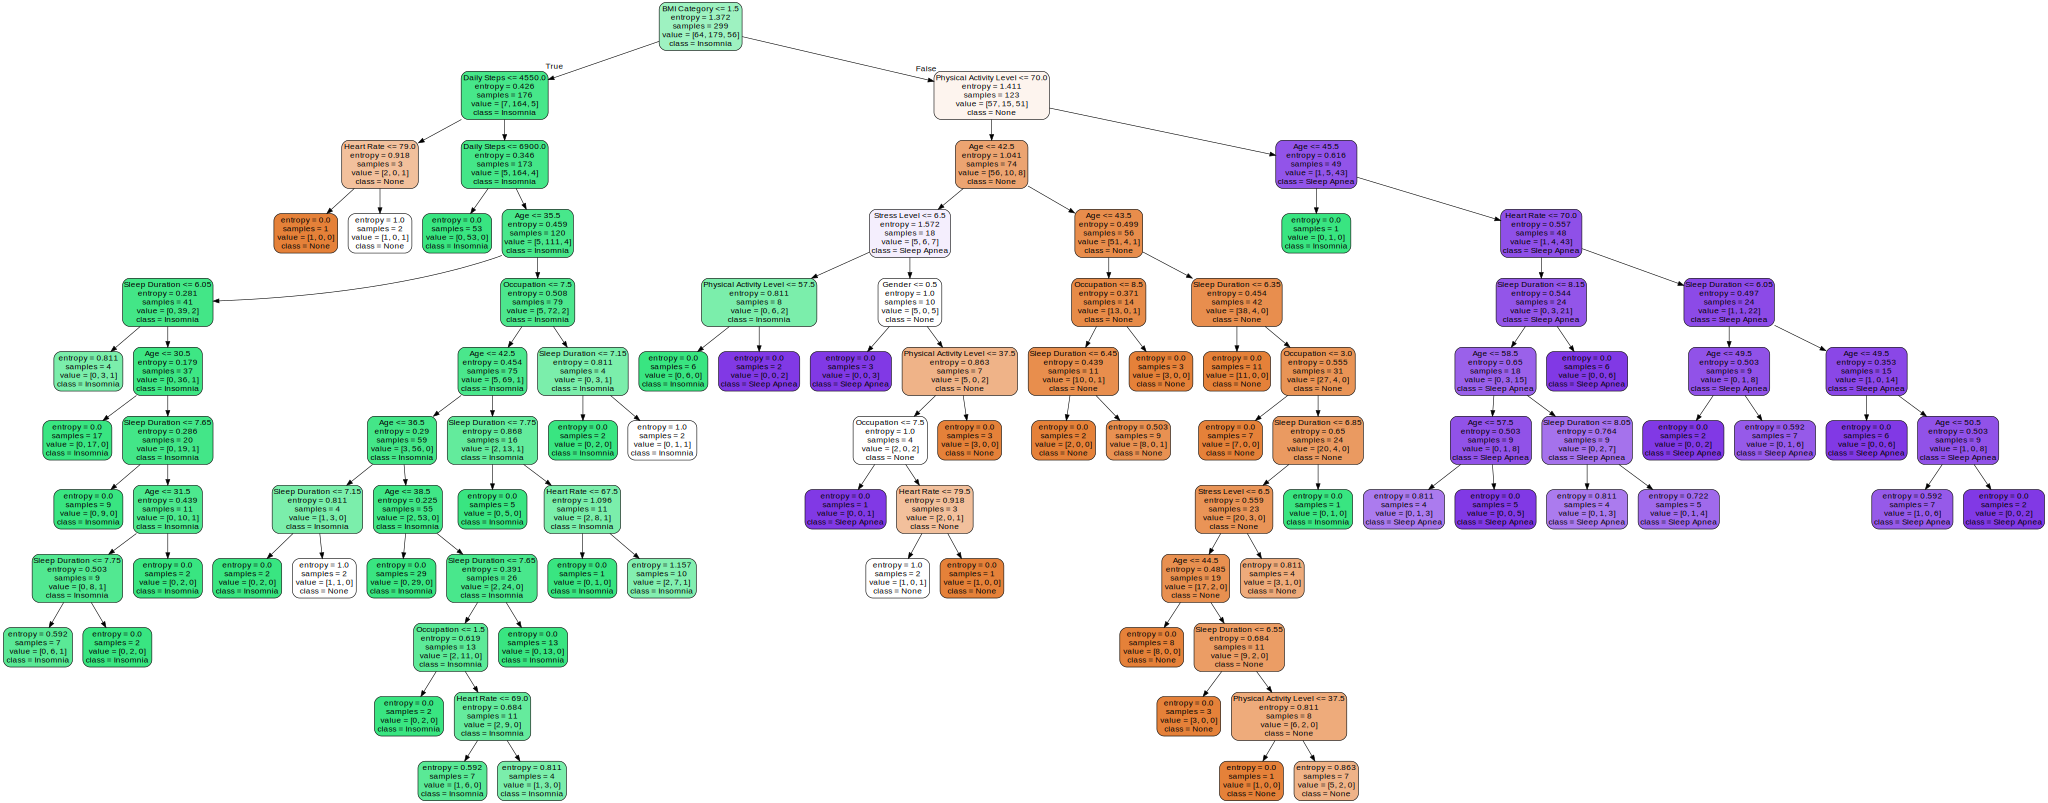

In [132]:
from sklearn.tree import export_graphviz
import graphviz

feature_names= ['Gender','Age','Occupation','Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level',
                'BMI Category','Heart Rate','Daily Steps','BP Classification']
class_names= ["None", "Insomnia", "Sleep Apnea"]
dot_data=export_graphviz(decision_tree_clf, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
graph = graphviz.Source(dot_data, format='png')
graph.render('Sleep_health_and_lifestyle_tree', view=False)
graph